# Lauren Ponsonby
# Question 1 - Portfolio construction 
###  decomposing the SWIX index minimising the tracking error and increasing the return correlation using a basket of no more than 20 stocks

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from datetime import datetime
import scipy.optimize as optimize

np.random.seed(123)

- I have taken the 'Sheet 3' spreadsheet from Assignment Data.xlsx and convcerted it into a CSV format and call it 'Merge2'
- I then call this spreadsheet into python using Pandas and refer to it as 'stock'  throughout the code
- I remove 'Dollar/Rand' and 'SA Volitility Index' from the 'stock' spreadsheet as to not interfere with the result

In [3]:
stock = pd.read_csv('Merge2.csv')
stock.drop('Dollar/Rand ', axis=1 , inplace=True)
stock.drop('SA Volatility Index ', axis=1 , inplace=True)
stock.head()

,Date,Sasol,Mondi Ltd,Mondi PLC,Sappi,Anglos,BHP Billiton,Bidvest,Remgro,Tigerbrands,...,Standard Bank,Discovery,Old mutual,Sanlam,Nepi Rockcastle,Fortress A,Fortress B,Growthpoint,Redefine,SWIX INDEX
0,2016/02/26,43424,28278,28417,6325,9967,15811,11228.67,23382.71,29313,...,11010,11900,3752,5297,17516.0,1500,3350,2424,1028,9850.53
1,2016/03/04,47831,29478,29423,6593,12341,18669,10556.74,24822.78,31372,...,12200,11000,3918,5770,18170.0,1500,3235,2420,1080,10388.86
2,2016/03/11,47091,29100,29253,6325,11177,17754,10877.30,24285.82,31625,...,12200,11250,4000,5962,18472.0,1490,3314,2500,1154,10300.17
3,2016/03/18,47489,29142,29231,6715,12172,18547,11572.57,25489.32,32584,...,13148,12066,4340,6664,18700.0,1540,3470,2550,1161,10855.19
4,2016/03/25,45400,29124,29294,6916,11022,17099,11576.00,24461.54,32639,...,12540,12048,4124,6442,18850.0,1560,3521,2444,1145,10537.02


In [4]:
returns_daily = stock.drop(columns=['Date ']).pct_change()
returns_annual = returns_daily.mean() * 250

### get daily and covariance of returns of the stock

In [5]:
cov_daily = returns_daily.cov()
cov_annual = cov_daily * 250

### empty lists to store returns, volatility and weights of imiginary portfolios

In [6]:
port_returns = []
port_volatility = []
stock_weights = []

### set the number of combinations for imaginary portfolios

Text(0,0.5,'returns')

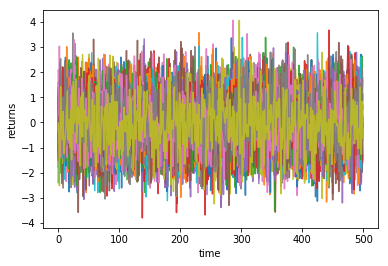

In [7]:
num_assets = len(returns_annual)
num_portfolios = 500

return_vec = np.random.randn(num_assets, num_portfolios)
plt.plot(return_vec.T, alpha=.9);
plt.xlabel('time')
plt.ylabel('returns')

### Produce 'n' random weights that sum to 1

In [8]:
def rand_weights(n):
    
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(num_assets))
print(rand_weights(num_assets))

[0.04732056 0.03243288 0.02470547 0.03718769 0.01601921 0.03048578
 0.01803897 0.0457689  0.02351963 0.05557101 0.00138461 0.06014501
 0.01870022 0.00037954 0.04075729 0.02022837 0.02634637 0.02083679
 0.0305009  0.00527433 0.00246778 0.01125085 0.01350799 0.01906911
 0.05709362 0.01443746 0.00566885 0.01945129 0.04399737 0.0630843
 0.030485   0.03092924 0.01356646 0.0102453  0.0098806  0.01979541
 0.02811967 0.04673459 0.00461159]
[0.00248847 0.02238408 0.03825785 0.03362501 0.04439918 0.00038706
 0.00791273 0.00279472 0.01132202 0.03578346 0.0361447  0.01126897
 0.02463352 0.05317628 0.01202358 0.01358779 0.00314327 0.04997668
 0.0068662  0.02789506 0.01785672 0.04089664 0.0431555  0.00206321
 0.03274922 0.01052503 0.04970979 0.00484314 0.05600578 0.01322702
 0.059365   0.05041411 0.01014204 0.00331719 0.04912359 0.02528918
 0.01748957 0.03283861 0.04291804]


In [9]:
rand_weights(num_assets).sum()

0.9999999999999999

### Below is the code that returns the Mean and Standard Deviation of returns for a random portfolio made up of all available stocks in spreadsheet

In [10]:
def random_portfolio(returns):
    

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 100:
        return random_portfolio(returns)
    return mu, sigma

- Upon plotting those you will observe that they form a characteristic parabolic shape called the 'Markowitz bullet' with the boundaries being called the 'Efficient Frontier', where we have the lowest variance for a given expected.

Text(0.5,1,'Mean and Standard Deviation of returns of randomly generated portfolios (Efficiency Frontier)')

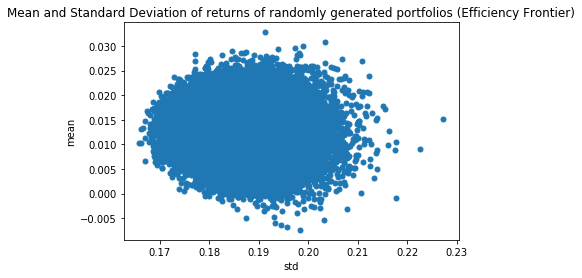

In [11]:
n_portfolios = 50000
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])


plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and Standard Deviation of returns of randomly generated portfolios (Efficiency Frontier)')

- In modern portfolio theory, the efficient frontier (or portfolio frontier) is an investment portfolio which occupies the 'efficient' parts of the risk-return spectrum. Formally, it is the set of portfolios which satisfy the condition that no other portfolio exists with a higher expected return but with the same standard deviation of return
- Tracking error, defined as the standard deviation of a fund’s active return relative to a specified benchmark (in our case the SWIX Index), measures the relative volatility of the fund.
- Covariance is an important measurement used in modern portfolio theory (MPT). MPT attempts to determine an efficient frontier for a mix of assets in a portfolio. The efficient frontier seeks to optimize the maximum return versus the degree of risk for the overall combined assets in the portfolio. The goal is to choose assets that have a lower standard deviation for the combined portfolio that is less than the standard deviation of the individual assets. This can reduce the volatility of the portfolio. 

## Now we minimize tracking error and ascertain optimal weightings

In [57]:
#First we accertain our Benchmark

def get_returns_for_column(column):
    return stock[column].pct_change().values[1:]

benchmark = get_returns_for_column("SWIX INDEX ")

corr_stock = stock.cov()
iterations_matrix = []                            # used to display the iteration of optimization
iteration_count = 1 

def callback(xk):                                 #callback is also to display the iteration to optimize weights
    global iteration_count
    row = [iteration_count]
    iteration_count += 1
    row.extend(xk.tolist())
    iterations_matrix.append(row)
    
def minimize_tracking_error(basket):                            
    n = len(basket)
    cons = ({'type': 'eq', 'fun': lambda x: sum(x)-1})                     #constraints that weights must sum to 1
    returns_matrix_for_basket = stock[basket].pct_change()[1:].values      #gets returns for basket
    swix_vector = get_returns_for_column("SWIX INDEX ").reshape(103,1)     #pulls the benchmark
    bds = [(0,1)] * n                                                      #bounds, if changed weights wont sum to 1
    initial_guess = [1.0/n]*n                
    def my_cost(w):
        return np.sum(np.square(returns_matrix_for_basket*w - swix_vector))
    return optimize.minimize(my_cost, initial_guess, constraints=cons, bounds=bds, callback=callback)
#a scipy optimization result is being returns, the final optimized weight is being returned here

my_basket = list(corr_stock['SWIX INDEX '].sort_values(ascending=False)[0:21].keys())
del my_basket[15 ]                  #removed the index from being called in optimized basket and iteration calculation 
                                                                                      


def get_best_weighting(basket):
    cols = ['Iterations']
    cols.extend(basket)
    res = minimize_tracking_error(basket)
    #print(res)
    iterations = pd.DataFrame(iterations_matrix, columns=cols)
    out = {}
    for i in range(len(basket)):
        out[basket[i]] = res.x[i]
    frame = pd.DataFrame(data={'Share': list(out.keys()), 'Weight': list(out.values())})
    return iterations, frame

iters, optimized_basket = get_best_weighting(my_basket)
print(optimized_basket)

                Share        Weight
0            Naspers   2.115440e-01
1             Capitec  7.104831e-02
2              Anglos  6.852531e-02
3           Mr Price   3.943946e-02
4       BHP Billiton   3.507366e-02
5          Discovery   8.814840e-02
6            Bidvest   0.000000e+00
7         Tigerbrands  1.252254e-17
8           Mondi Ltd  1.249543e-17
9           Mondi PLC  1.493488e-17
10          Shoprite   4.322145e-02
11     Standard Bank   9.553338e-02
12  British American   0.000000e+00
13             Sasol   6.200557e-02
14         Richemont   6.044427e-18
15            Sanlam   1.196561e-01
16           Nedbank   0.000000e+00
17             Sappi   7.860466e-18
18         Firstrand   9.301008e-02
19       RMB Holdings  7.279427e-02


In [58]:
optimized_basket['Weight'].values

array([2.11543985e-01, 7.10483131e-02, 6.85253091e-02, 3.94394598e-02,
       3.50736609e-02, 8.81483999e-02, 0.00000000e+00, 1.25225351e-17,
       1.24954300e-17, 1.49348849e-17, 4.32214518e-02, 9.55333843e-02,
       0.00000000e+00, 6.20055718e-02, 6.04442711e-18, 1.19656112e-01,
       0.00000000e+00, 7.86046575e-18, 9.30100780e-02, 7.27942743e-02])

In [60]:
len(optimized_basket)

20

- Confirming that the basket is of 20 optimized stocks

In [61]:
format(optimized_basket['Weight'].sum(), '.7f')

'1.0000000'

- Above code confirming that the basket weightings Sum to 1 

#### For better viewing of the basket I have slightly altered to code to produce percentages that Sum to 100% instead of exponential variable that sum to 1

In [62]:
def get_best_weighting(basket):
    cols = ['Iterations']
    cols.extend(basket)
    res = minimize_tracking_error(basket)
    #print(res)
    iterations = pd.DataFrame(iterations_matrix, columns=cols)
    out = {}
    for i in range(len(basket)):
        out[basket[i]] = "{0:.5f}%".format(100*res.x[i])
    frame = pd.DataFrame(data={'Share': list(out.keys()), 'Weight': list(out.values())})
    return iterations, frame

iters1, optimized_basket1 = get_best_weighting(my_basket)
print(optimized_basket1)

                Share     Weight
0            Naspers   21.15440%
1             Capitec   7.10483%
2              Anglos   6.85253%
3           Mr Price    3.94395%
4       BHP Billiton    3.50737%
5          Discovery    8.81484%
6            Bidvest    0.00000%
7         Tigerbrands   0.00000%
8           Mondi Ltd   0.00000%
9           Mondi PLC   0.00000%
10          Shoprite    4.32215%
11     Standard Bank    9.55334%
12  British American    0.00000%
13             Sasol    6.20056%
14         Richemont    0.00000%
15            Sanlam   11.96561%
16           Nedbank    0.00000%
17             Sappi    0.00000%
18         Firstrand    9.30101%
19       RMB Holdings   7.27943%


## Next I used a Pie chart to further visually display the weightings of the optimized basket

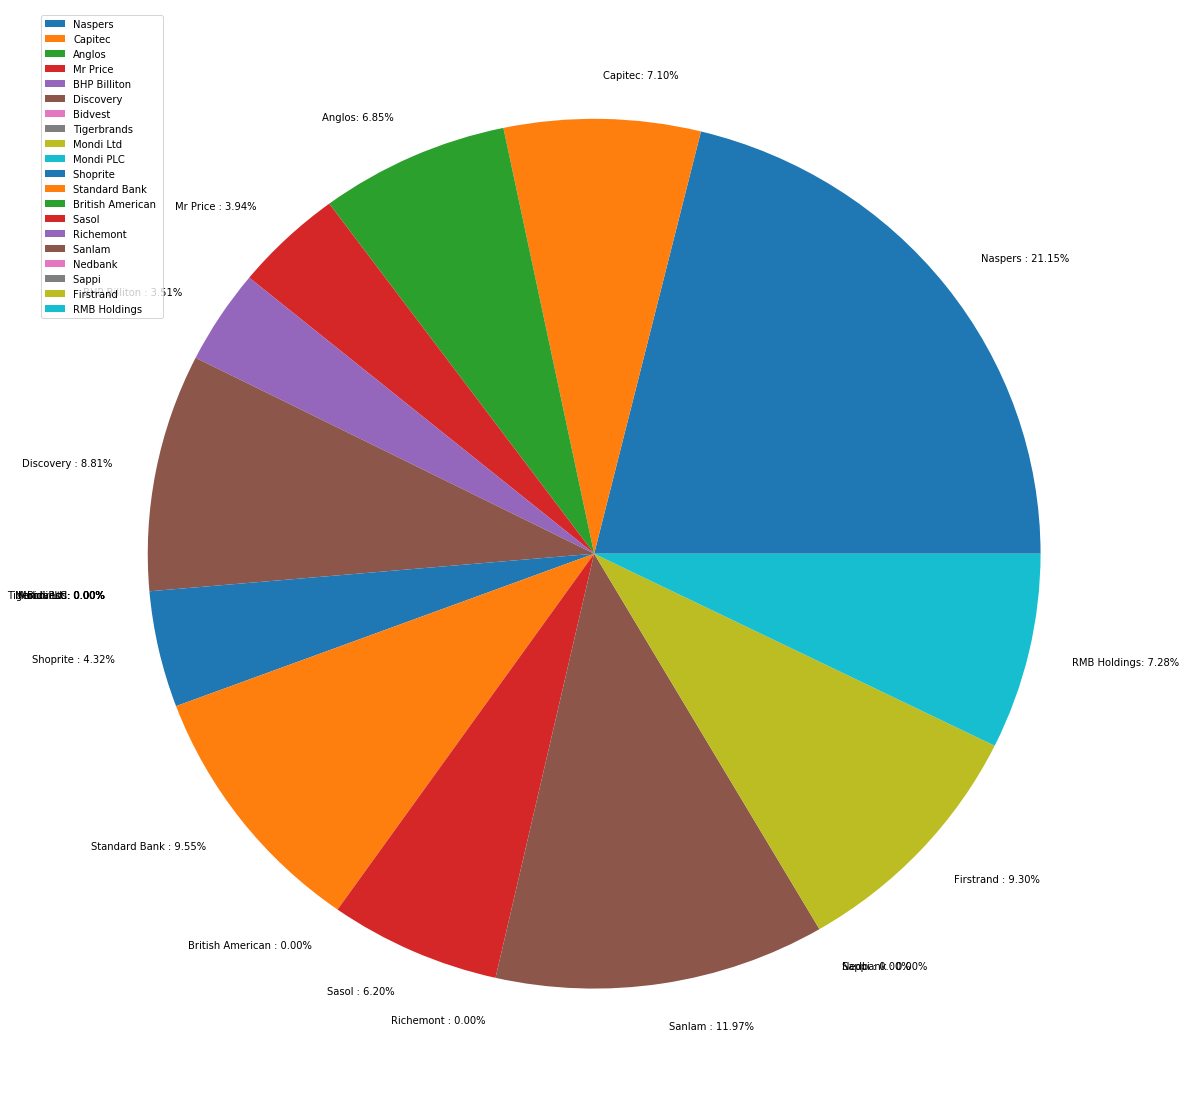

In [63]:
plt.figure(figsize=(20,20))
percent_strings = []
for index, row in optimized_basket.iterrows():
    percent_strings.append(row[0] + ": " + format(100*row[1], '.2f') + "%")
plt.pie(optimized_basket.Weight, labels=percent_strings)
plt.legend(optimized_basket.Share)
plt.show()

- Some of the optimized basket weightings summate to zero, therefore certain parts of the Pie Chart have overlapping heading. So further, I have removed all such weightings that are zero, to make for a more visually pleasing and easy to read/understand graph

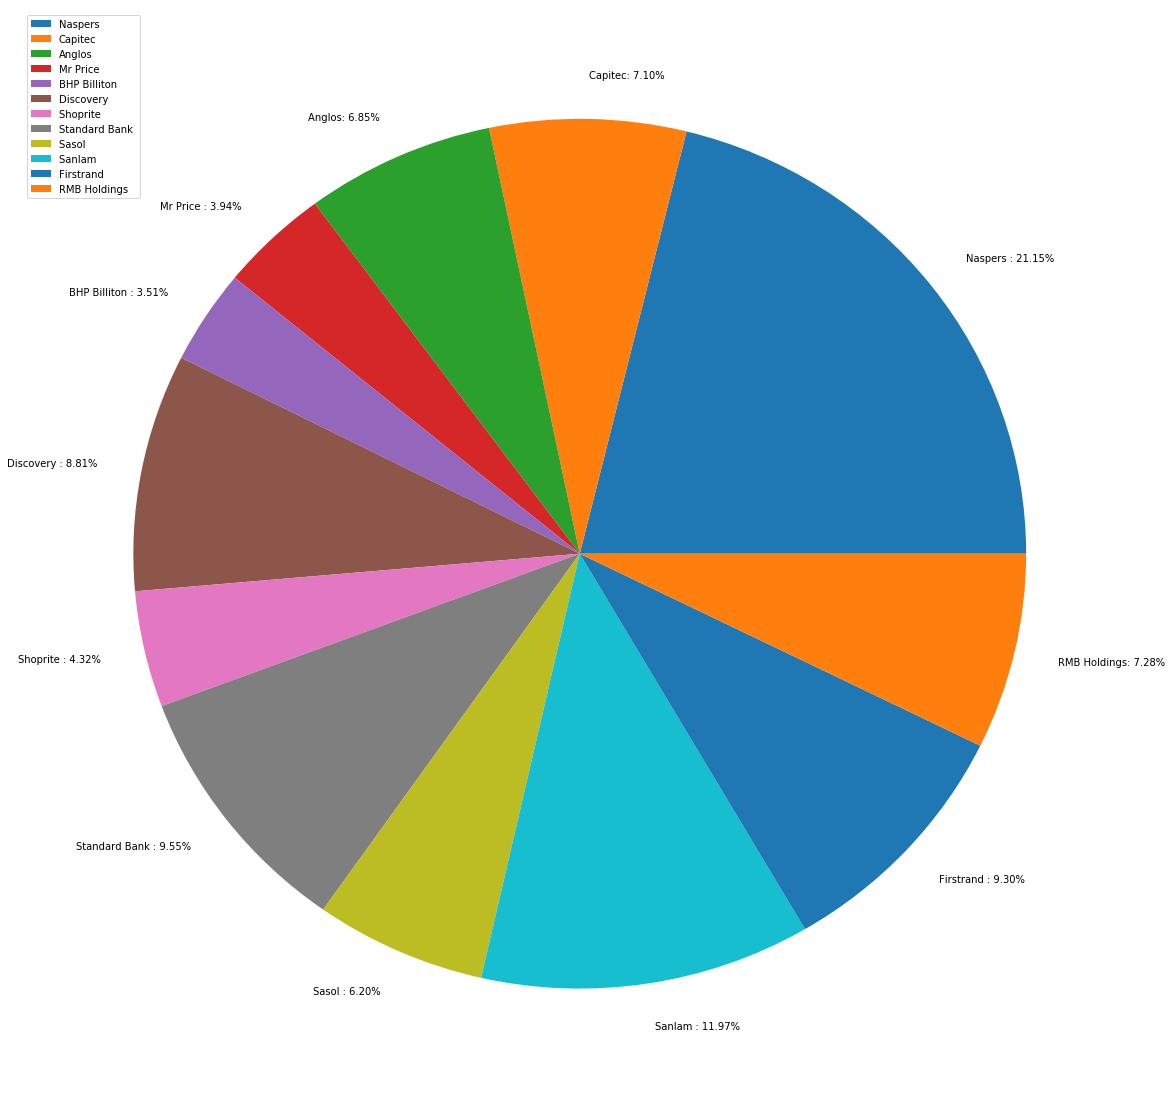

In [64]:
non_zero = optimized_basket[optimized_basket.Weight > 1e-6]
plt.figure(figsize=(20,20))
percent_strings = []
for index, row in non_zero.iterrows():
    percent_strings.append(row[0] + ": " + format(100*row[1], '.2f') + "%")
plt.pie(non_zero.Weight, labels=percent_strings)
plt.legend(non_zero.Share)
plt.show()

- For interest's sake I have included the above table, which shows how many iterations it took for the code to minimize the tracking error. Which is only 7 iterations
- Finally I conclude,

In [65]:
returns_daily

,Sasol,Mondi Ltd,Mondi PLC,Sappi,Anglos,BHP Billiton,Bidvest,Remgro,Tigerbrands,Steinhoff,...,Standard Bank,Discovery,Old mutual,Sanlam,Nepi Rockcastle,Fortress A,Fortress B,Growthpoint,Redefine,SWIX INDEX
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.101488,0.042436,0.035401,0.042372,0.238186,0.180760,-0.059841,0.061587,0.070242,0.066265,...,0.108084,-0.075630,0.044243,0.089296,0.037337,0.000000,-0.034328,-0.001650,0.050584,0.054650
2,-0.015471,-0.012823,-0.005778,-0.040649,-0.094320,-0.049012,0.030365,-0.021632,0.008065,0.012994,...,0.000000,0.022727,0.020929,0.033276,0.016621,-0.006667,0.024420,0.033058,0.068519,-0.008537
3,0.008452,0.001443,-0.000752,0.061660,0.089022,0.044666,0.063919,0.049556,0.030324,0.049861,...,0.077705,0.072533,0.085000,0.117746,0.012343,0.033557,0.047073,0.020000,0.006066,0.053885
4,-0.043989,-0.000618,0.002155,0.029933,-0.094479,-0.078072,0.000296,-0.040322,0.001688,0.009775,...,-0.046243,-0.001492,-0.049770,-0.033313,0.008021,0.012987,0.014697,-0.041569,-0.013781,-0.029310
5,-0.041608,-0.027606,-0.029835,-0.051619,0.009345,-0.053746,-0.010620,0.007022,0.017402,-0.009680,...,0.028708,-0.010292,-0.021581,0.033375,0.009443,0.007051,0.011644,0.004501,0.027074,-0.011853
6,-0.036221,-0.035275,-0.034272,-0.028968,0.027596,-0.011187,-0.017663,-0.008966,-0.010269,0.010200,...,-0.047907,-0.006709,-0.035192,-0.045666,0.004940,0.004456,0.012914,-0.018330,0.006803,-0.003282
7,0.069465,0.008858,0.011076,0.012718,0.216060,0.160385,0.000498,0.047891,0.014726,-0.062579,...,0.046084,0.066785,0.029283,0.062018,-0.015061,0.004436,-0.007483,0.017012,0.027027,0.028000
8,0.030637,-0.034938,-0.038414,-0.067132,0.083369,0.100512,-0.006028,-0.001612,0.034453,-0.044654,...,0.005760,0.011159,-0.001497,0.032904,-0.072741,0.006940,0.035186,0.017544,-0.020559,-0.012579
9,0.004716,0.027331,0.024884,0.025428,0.052387,-0.045568,0.004952,-0.017603,0.020754,0.044745,...,-0.011608,-0.004227,-0.028993,-0.009901,0.026340,0.002506,0.014297,0.008420,0.031906,0.001832


In [76]:
wt_table = {}
for _, row in optimized_basket.iterrows():
    wt_table[row.Share] = row.Weight

In [107]:
basket_returns = np.zeros(104)
def return_for_row(i):
    ret = 0
    for equity in wt_table.keys():
        ret += 10*wt_table[equity] * returns_daily[equity].loc[i]
    return ret

for i in range(1, 104):
    basket_returns[i-1] = return_for_row(i)
    
returns = 100*returns_daily['SWIX INDEX ']

### Next I will plot the volatility of the index and the volatility of the Optimized Basket


- This clearly shows how the Optimized basket reduced the volatililty, as opposed to the volatility of the SWIX INDEX

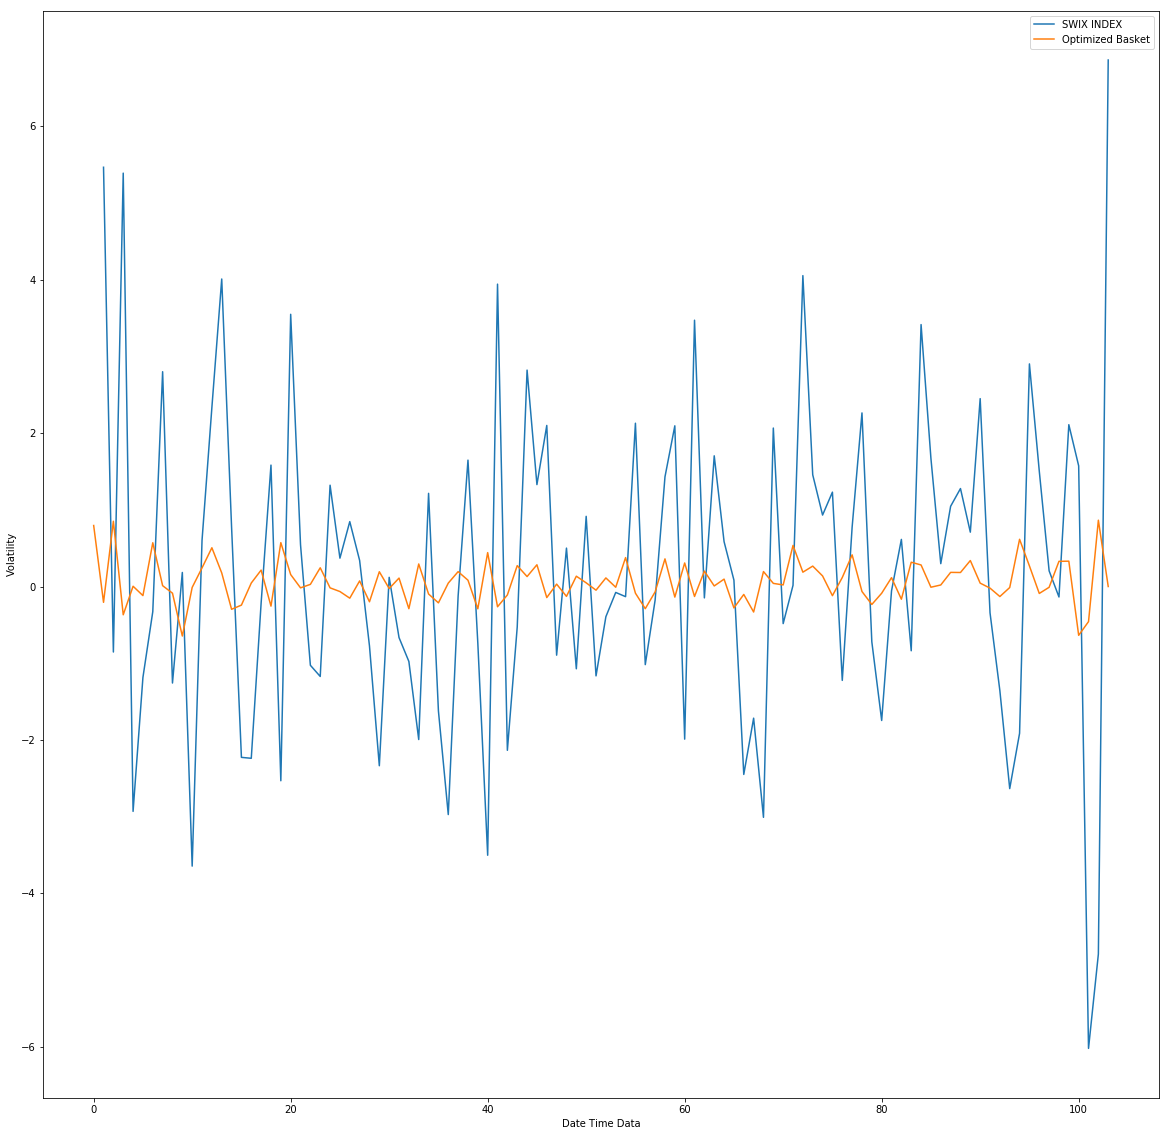

In [111]:
plt.figure(figsize=(20,20))
plt.plot(returns)
plt.plot(basket_returns, label='Optimized Basket')
plt.xlabel('Date Time Data')
plt.ylabel('Volatility')
plt.legend(loc='best')

In [69]:
count1 = 0
for i in range(1, 103):
    if basket_returns[i] > returns[i]:
        count1+=1

In [70]:
count1/103

0.5436893203883495

In [71]:
def value_for_row(i):
    ret = 0
    for equity in wt_table.keys():
        ret += wt_table[equity] * stock[equity].loc[i]
    return ret

In [72]:
portfolio_value = np.zeros(103)
for i in range(0,103):
    portfolio_value[i] = value_for_row(i)
portfolio_value

array([ 51559.74746319,  55628.54747222,  54218.66532624,  59974.14384573,
        58495.20219953,  56605.74433264,  57781.76767535,  59371.28612902,
        56383.79369   ,  55608.20333563,  53543.6408746 ,  55582.59528179,
        58167.97968209,  62096.00518474,  62889.22701581,  61273.68753068,
        58798.85486773,  59197.57292754,  60675.71314331,  58704.71231208,
        61554.27303164,  61551.87754892,  60290.29374954,  59155.66399358,
        59667.97063752,  62529.18080038,  64644.92284741,  66451.46077164,
        66537.01773708,  65547.12451545,  63739.80421102,  64405.38795848,
        64215.94215624,  62838.40460502,  64548.73777681,  63480.8038551 ,
        59388.43755144,  58719.86985131,  60681.54567098,  58884.27573489,
        56253.21906677,  57748.03097117,  56598.81933883,  55694.21820323,
        57652.19552858,  59901.63422224,  61518.46881705,  60894.61323761,
        60526.88892642,  61391.21078007,  61396.34800565,  60869.67868305,
        60638.95642259,  

### Now I will show how the expected return of the bacsket out performs the expected return of the SWIX INDEX

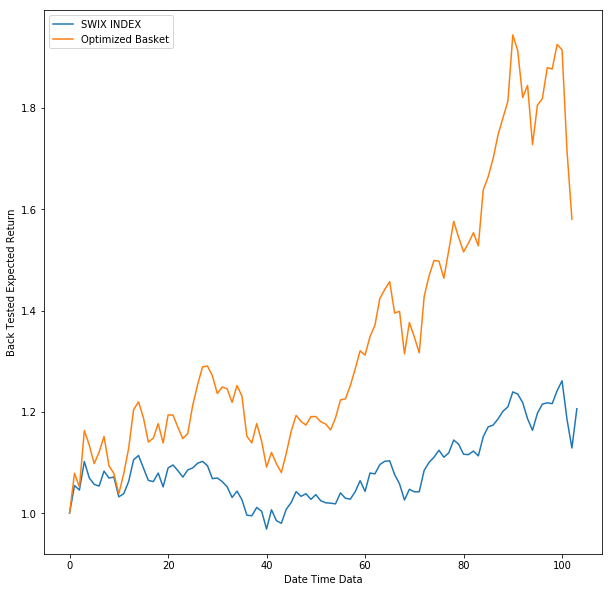

In [113]:
plt.figure(figsize=(10,10))
plt.plot(stock['SWIX INDEX ']/stock['SWIX INDEX '][0])
plt.xlabel('Date Time Data')
plt.ylabel('Back Tested Expected Return')
plt.plot(portfolio_value/portfolio_value[0], label='Optimized Basket')
plt.legend(loc='best')